In [1]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


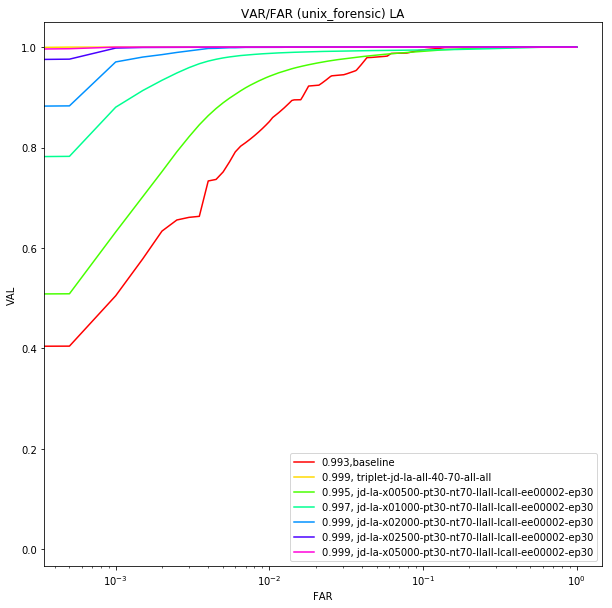

In [1]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import library.helpers as h
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
from scipy.integrate import simps
from scipy.interpolate import interp1d


LOG_NAME = "unix_forensic"
VIZUALIZATIONS_DIR = "visualizations"

fig = plt.figure(figsize=(10,10))

# TODO redo this one [ 
MODEL_NAMES = [ "lstm-ae", "triplet-la", "triplet-jd-la-all-40-70-all-all", "triplet-jd-la-non-60-65-non-non",  "triplet-jd-la-00500-60-65-all-all-00001", 
              "triplet-jd-la-00500-60-65-all-00001-non", "triplet-jd-la-01000-60-65-all-all-00001", "triplet-jd-la-05000-60-65-all-all-00001", "jd-la-x05000-pt60-nt65-llall-lcall-ee00001-ep20", "jd-la-xnon-pt40-nt70-llall-lcall-ee00001-ep50"] 


MODEL_NAMES_JD = [
    "triplet-jd-la-all-40-70-all-all", # baseline, all labels
    "triplet-jd-la-non-60-65-non-non","triplet-jd-la-non-40-70-non-non",  # jd no labels, 10 ep
    "jd-la-xnon-pt60-nt65-llnon-lcnon-eenon-ep50", 
    "jd-la-xnon-pt30-nt75-llnon-lcnon-eenon-ep50"
    #"jd-la-x02000-pt55-nt65-llnon-lc00003-ee00002-ep10","jd-la-x02000-pt55-nt65-llnon-lc00003-ee00002-ep20",
    #"triplet-jd-la-05000-60-65-all-all-00001", "jd-la-x05000-pt60-nt65-llall-lcall-ee00001-ep20",
] 

MODEL_NAMES_LA = [
    "triplet-jd-la-all-40-70-all-all", # baseline, all labels
    "jd-la-x00500-pt30-nt70-llall-lcall-ee00002-ep30", # 500 labels 
    "jd-la-x01000-pt30-nt70-llall-lcall-ee00002-ep30", # 1000 labels
    "jd-la-x02000-pt30-nt70-llall-lcall-ee00002-ep30", # 2000 labels
    "jd-la-x02500-pt30-nt70-llall-lcall-ee00002-ep30", # 2500 labels 
    "jd-la-x05000-pt30-nt70-llall-lcall-ee00002-ep30", # 5000 labels 
] 

MODEL_NAMES_NT60 = [
    "jd-la-xnon-pt10-nt60-llnon-lcnon-ee00002-ep30", # 
    "jd-la-xnon-pt20-nt60-llnon-lcnon-ee00002-ep30", # 
    "jd-la-xnon-pt30-nt60-llnon-lcnon-ee00002-ep30", # 
    "jd-la-xnon-pt40-nt60-llnon-lcnon-ee00002-ep30", # 
    "jd-la-xnon-pt50-nt60-llnon-lcnon-ee00002-ep30",
]

MODEL_NAMES_NT70 = [
    "jd-la-xnon-pt10-nt70-llnon-lcnon-ee00002-ep30", # 
    "jd-la-xnon-pt20-nt70-llnon-lcnon-ee00002-ep30", # 
    "jd-la-xnon-pt30-nt70-llnon-lcnon-ee00002-ep30", # 
    "jd-la-xnon-pt40-nt70-llnon-lcnon-ee00002-ep30", # 
    "jd-la-xnon-pt50-nt70-llnon-lcnon-ee00002-ep30",
    "jd-la-xnon-pt60-nt70-llnon-lcnon-ee00002-ep30"
]

MODEL_NAMES_NT80 = [
    "jd-la-xnon-pt10-nt80-llnon-lcnon-ee00002-ep30", # 
    "jd-la-xnon-pt20-nt80-llnon-lcnon-ee00002-ep30", # 
    "jd-la-xnon-pt30-nt80-llnon-lcnon-ee00002-ep30", # 
    "jd-la-xnon-pt40-nt80-llnon-lcnon-ee00002-ep30", # 
    "jd-la-xnon-pt50-nt80-llnon-lcnon-ee00002-ep30",
    "jd-la-xnon-pt60-nt80-llnon-lcnon-ee00002-ep30",
    "jd-la-xnon-pt70-nt80-llnon-lcnon-ee00002-ep30"
]

MODEL_NAMES_10 = [
    #"jd-la-xnon-pt10-nt90-llnon-lcnon-ee00002-ep20",
    #"jd-la-xnon-pt20-nt90-llnon-lcnon-ee00002-ep20",
    #"jd-la-xnon-pt30-nt90-llnon-lcnon-ee00002-ep20",
    #"jd-la-xnon-pt40-nt90-llnon-lcnon-ee00002-ep20",
    "jd-la-xnon-pt50-nt90-llnon-lcnon-ee00002-ep20",
    "jd-la-xnon-pt52-nt70-llnon-lcnon-ee00002-ep30",
    #"jd-la-xnon-pt60-nt90-llnon-lcnon-ee00002-ep20",
    #"jd-la-xnon-pt70-nt90-llnon-lcnon-ee00002-ep20",
    #"jd-la-xnon-pt80-nt90-llnon-lcnon-ee00002-ep20",
    "jd-la-xnon-pt52-nt90-llnon-lcnon-ee00002-ep200",
    
]



MODEL_NAMES = MODEL_NAMES_LA

# "triplet-jd-la-2000-55-70-40", "lstm-ae", "triplet-la", "triplet-jd-la-3000-55-70-55-30", "triplet-jd-la-ma-1500"
# ["triplet-jd-la-2000-55-70-40","triplet-jd-la-3000-55-70-55-30","triplet-jd-la-3000-50-70-55-30"]
# [ "triplet-jd-la-1500-055-70-40", "triplet-jd-la-1500-55-75-40"]
# "triplet-jd-la-1500-060-70-40", "triplet-jd-la-1500-055-70-40", "triplet-jd-la-1500-050-70-40",
# ["triplet-jd-la-1500-050-065-25", "triplet-jd-la-1500-065-070-25", "triplet-jd-la-1500-060-060-25"]

#["triplet-jd-la-ma-500-02-03","triplet-jd-la-ma-750","triplet-jd-la-ma-1000",  # "#4169e1",
#               "triplet-jd-la-ma-1500",
#               "triplet-jaccard","triplet-jaccard-margin",
#               "triplet-label", # all labels
#               "lstm-ae"]
COLORS = h.get_N_HexCol(len(MODEL_NAMES)+1)

fac_n = np.arange(0, 1.0, 0.0005)

baseline_valid_accepts = h.load_from_json("data/ji_%s_basline-jaccard_valid.json"%LOG_NAME)
baseline_false_accepts = [np.round(f,5) for f in h.load_from_json("data/ji_%s_basline-jaccard_false.json"%LOG_NAME)]

interpolated_vac = interp1d(baseline_false_accepts, baseline_valid_accepts)
vac_n = interpolated_vac(fac_n)
auc_score = auc(fac_n, vac_n)


plt.plot( fac_n,  interpolated_vac(fac_n), color='r', label="%0.3f,baseline"%auc_score)
plt.xscale("log")


for i, model_name in enumerate(MODEL_NAMES):
    #print(model_name)
    valid_accepts = h.load_from_json("data/%s_%s_valid.json"%(model_name, LOG_NAME))
    false_accepts = h.load_from_json("data/%s_%s_false.json"%(model_name, LOG_NAME))
    interpolated_vac = interp1d(false_accepts, valid_accepts)
    auc_score = auc(fac_n, interpolated_vac(fac_n))
    plt.plot( fac_n, interpolated_vac(fac_n) , color=COLORS[i+1], label="%0.3f, %s"%(auc_score,  model_name))

plt.title("VAR/FAR (%s) LA"%LOG_NAME)
plt.xlabel('FAR')
plt.ylabel('VAL')
plt.legend(loc='lower right')
plt.show()
#plt.savefig("%s/roc_%s.png"%(VIZUALIZATIONS_DIR, LOG_NAME))
